<a href="https://colab.research.google.com/github/ulti72/KMClustering/blob/master/KMClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Uploading kaggle.json from kaggle account
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ulti72","key":"48282a59b3c253605adb3ce5aa7ad10a"}'}

In [0]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [0]:
# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
#Downloading dataset from kaggle.
!kaggle datasets download -d moltean/fruits 

 98% 697M/709M [00:09<00:00, 93.9MB/s]
100% 709M/709M [00:09<00:00, 78.4MB/s]


In [0]:
# Unzip the data
!unzip fruits.zip

In [0]:
# making director for training data set...
!mkdir train

In [0]:
#moving training data from sub-folders to a single folder train: ignoring labels,
import os
import shutil

for root, dirs, files in os.walk('/content/fruits-360/Training'):
   for file in files:
      path_file = os.path.join(root,file)
      shutil.copy2(path_file,'/content/train')

In [0]:
#Function for reading image files from path in a array
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

# defining global variable path
image_path = "/content"

#function to load folder into arrays and then it returns that same array
def loadImages(path):
    # Put files into lists and return them as one list of size 4
    image_files = sorted([os.path.join(path, 'train', file)
         for file in os.listdir(path + "/train") if      file.endswith('.jpg')])
 
    return image_files

In [15]:
#Training images name loaded into array...
image=loadImages(image_path)


list

In [0]:
# Display two images a= image[i] and b = train[i] where i is the ith image.
def display(a, b, title1 = "Original", title2 = "Processed"):
    a= cv2.imread(a)
    plt.subplot(121), plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(b), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()

    



In [0]:
# Preprocessing, removing noise
train=[]
def processing(data):
    
    #reading image
    img = [cv2.imread(i, cv2.IMREAD_UNCHANGED) for i in data]
    # Remove noise
    # Using Gaussian Blur
    no_noise = []
    for i in range(len(img)):
        blur = cv2.GaussianBlur(img[i], (5, 5), 0)
        no_noise.append(blur)
        image = no_noise[i]
        train.append(image)
    
 



In [0]:
#Preprocessing and putting data into np array...
processing(image)
train = np.array(train)

In [134]:
#1717 training data with 100x100 resolution and 3 is RGB values for each pixel
train.shape

(1717, 100, 100, 3)

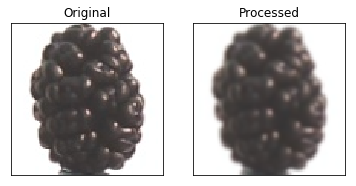

(100, 100, 3)


In [135]:
#Original data vs Processed data
display(image[0],train[0])
l = cv2.imread(image[0])
print(l.shape)


